# Анализ сайта «СберАвтоподписка»

## 0. Введение

### Описание данных

Датасеты содержат данные из Google Analytics (last-click attribution model) по сайту «СберАвтоподписка»

В *GA_Sessions* содержится информация о визитах на сайт

**Описание атрибутов:**
- session_id — ID визита;
- client_id — ID посетителя;
- visit_date — дата визита;
- visit_time — время визита;
- visit_number — порядковый номер визита клиента;
- utm_source — канал привлечения;
- utm_medium — тип привлечения;
- utm_campaign — рекламная кампания;
- utm_adcontent — содержание объявления;
- utm_keyword — ключевое слово;
- device_category — тип устройства;
- device_os — ОС устройства;
- device_brand — марка устройства;
- device_model — модель устройства;
- device_screen_resolution — разрешение экрана;
- device_browser — браузер;
- geo_country — страна;
- geo_city — город.

В *GA_Hits* информация о событиях на сайте

**Описание атрибутов:**
- session_id — ID визита;
- hit_date — дата события;
- hit_time — время события;
- hit_number — порядковый номер события в рамках сессии;
- hit_type — тип события;
- hit_referer — источник события;
- hit_page_path — страница события;
- event_category — тип действия;
- event_action — действие;
- event_label — тег действия;
- event_value — значение результата действия.

### Задачи:

**Провести проверку следующих гипотез:**
- Органический трафик не отличается от платного с точки зрения CR
(Conversion Rate) в целевые события.
- Трафик с мобильных устройств не отличается от трафика
с десктопных устройств с точки зрения CR (Conversion Rate)
в целевые события.
- Трафик из городов присутствия (Москва и область, Санкт-Петербург)
не отличается от трафика из иных регионов с точки зрения CR
(Conversion Rate) в целевые события.

**Дать ответы на вопросы продуктовой команды:**
- Из каких источников / кампаний / устройств / локаций к нам идёт
самый целевой трафик (и с точки зрения объёма трафика, и с точки
зрения CR)?
- Какие авто пользуются наибольшим спросом? У каких авто самый
лучший показатель CR (Conversion Rate) в целевые события?
- Стоит ли нам увеличивать своё присутствие в соцсетях и давать там
больше рекламы?

## [1. Загрузка данных](#1.-Загрузка-данных.)
- загрузка библиотек
- загрузка датасетов

## [2. Подготовка данных](#2.-Подготовка-данных.)
- создание дополнительных фичей
- удаление лишних колонок
- заполнение пропусков в данных
- объединение датасетов

## [3. Проверка гипотез](#3.-Проверка-гипотез.)

## [4. Ответы на вопросы продуктовой команды](#4.-Ответы-на-вопросы-продуктовой-команды.)



## 1. Загрузка данных.

In [1]:
# загрузка библиотек
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
import missingno as msno
from scipy import stats 

from datetime import datetime, date, time

import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузка датасетов
ga_sessions = pd.read_csv('data/ga_sessions.csv', low_memory=False)
ga_hits = pd.read_csv('data/ga_hits.csv')

In [3]:
# сразу зададим уровень статистической значимости
alpha = 0.05

# список меток для соцсетей
socials = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

# список меток органического трафика
organic = ['organic', 'refferal', '(none)']

# список целевых действий
target_actions = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click', 'sub_call_number_click', 
                  'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']

# список городов в Московской и Ленинградской областях
capital_satelites = ['Aprelevka', 'Balashikha', 'Beloozyorskiy', 'Chekhov', 'Chernogolovka', 'Dedovsk', 
 'Dmitrov', 'Dolgoprudny', 'Domodedovo', 'Dubna', 'Dzerzhinsky','Elektrogorsk', 'Elektrostal', 'Yegoryevsk',
 'Elektrougli', 'Fryazino', 'Golitsyno', 'Istra', 'Ivanteyevka', 'Izhevsk', 'Kashira', 'Khimki', 
 'Khotkovo', 'Klin', 'Kolomna', 'Korolyov', 'Kotelniki', 'Kraskovo','Krasnoarmeysk', 'Krasnogorsk', 'Petrovo-Dalneye',
 'Krasnoznamensk', 'Kubinka', 'Kurovskoye', 'Likino-Dulyovo', 'Lobnya', 'Losino-Petrovsky', 'Novoye Devyatkino', 
 'Lukhovitsy', 'Lytkarino', 'Lyubertsy', 'Mozhaysk', 'Mytishchi', 'Naro-Fominsk', 'Nakhabino', 
 'Noginsk', 'Odintsovo', 'Orekhovo-Zuyevo', 'Pavlovsky Posad', 'Podolsk', 'Protvino', 'Pushchino', 
 'Pushkino', 'Ramenskoye', 'Reutov', 'Ruza', 'Sergiyev Posad', 'Serpukhov', 'Solnechnogorsk', 
 'Staraya Kupavna', 'Stupino', 'Shchyolkovo', 'Shatura', 'Vidnoye', 'Volokolamsk', 'Voskresensk', 
 'Yakhroma', 'Zheleznodorozhny', 'Zhukovskiy', 'Zvenigorod', 'Moscow', 'Boksitogorsk', 'Volosovo', 'Volkhov', 'Vsevolozhsk', 'Vyborg', 'Vysotsk', 'Gatchina', 
  'Ivangorod', 'Kamennogorsk', 'Kingisepp', 'Kirishi', 'Kirovsk', 'Communar', 'Kudrovo', 
  'Lodeynoye Pole', 'Luban', 'Murino', 'Nikolskoye', 'Novaya Ladoga', 'Otradnoe', 'Pikalevo', 'Tomilino',
  'Podporozhie', 'Primorsk', 'Priozersk', 'Svetogorsk', 'Sertolovo', 
  'Slantsy', 'Sosnovy Bor', 'Syasstroy', 'Tikhvin', 'Tosno', 'Shlisselburg', 'Saint Petersburg']

## 2. Подготовка данных.

### Начнём с *ga_sessions*

In [4]:
print(ga_sessions.shape)
ga_sessions.head()

(1563538, 18)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1.0,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2.0,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [5]:
# проверим, есть ли в данных дубликаты
print('Кол-во дубликатов в данных:', ga_sessions.duplicated().sum())

Кол-во дубликатов в данных: 0


Для анализа нам нужны только два типа устройств – `mobile` и `desktop`, но в данных есть ещё планшеты. 
Видим, что их меньше процента от общего объёма трафика, поэтому приравняем планшеты к мобильным устройствам

In [6]:
ga_sessions.groupby('device_category')['session_id'].nunique() / len(ga_sessions) * 100

device_category
desktop    19.756092
mobile     79.264271
tablet      0.979573
Name: session_id, dtype: float64

In [7]:
ga_sessions.device_category[ga_sessions.device_category == 'tablet'] = 'mobile'

Поменяем формат колонки `visit_date` на `datetime` и создадим доп колонку с номером месяца для последующей группировки. Данные представлены только за один год, поэтому отдельно выносить его значение не будем

In [8]:
ga_sessions.visit_date = pd.to_datetime(ga_sessions.visit_date)
ga_sessions['visit_month'] = ga_sessions.visit_date.apply(
    lambda x: x.month)

Создадим дополнительные категории

Трафик разделим на рекламный и органический, и отделим трафик из соцсетей от других источников

Географию поделим на столицы и остальные регионы

In [9]:
ga_sessions['geo_category'] = ga_sessions.geo_city.apply(
    lambda x: 'capital' if x in capital_satelites else 'other')

ga_sessions['trafic_type'] = ga_sessions.utm_medium.apply(
    lambda x: 'organic' if x in organic else 'ads')

ga_sessions['source_type'] = ga_sessions.utm_source.apply(
    lambda x: 'social' if x in socials else 'other')

Удалим колонки, которые нам не понадобятся для анализа

In [10]:
ga_sessions = ga_sessions.drop(columns=['visit_time', 'visit_date', 'visit_number', 'client_id', 'device_model', 'utm_keyword', 'device_os', 'device_screen_resolution', 'device_browser', 'utm_medium', 'utm_adcontent', 'device_brand'])

Оработаем пропуски в данных

In [11]:
# посмотрим процент пропущенных значений для каждого признака
missing_values = (ga_sessions.isna().sum() / len(ga_sessions) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
print(missing_values) 

Процент пропущенных значений:
utm_campaign       11.786026
utm_source          0.005308
device_category     0.000064
geo_country         0.000064
geo_city            0.000064
visit_month         0.000064
session_id          0.000000
geo_category        0.000000
trafic_type         0.000000
source_type         0.000000
dtype: float64


Пропуски в `utm_source` и `utm_campaign` заменим на значение (not set), так же как неопределенные источники обозначается в Google Аналитике

In [12]:
ga_sessions.utm_source = ga_sessions.utm_source.fillna('(not set)')
ga_sessions.utm_campaign = ga_sessions.utm_campaign.fillna('(not set)')

Строки с пропусками в признаках `device_category`, `geo_country`, `geo_city`, и `visit_month` можно просто удалить, в датасете их очень мало

In [13]:
ga_sessions = ga_sessions.dropna(subset=['device_category', 'geo_country', 'geo_city', 'visit_month'])

Посмотрим на результат и запишем обработанный датасет в csv файл для дальнейшей работы

In [14]:
print(ga_sessions.shape)
ga_sessions.head()

(1563537, 10)


,session_id,utm_source,utm_campaign,device_category,geo_country,geo_city,visit_month,geo_category,trafic_type,source_type
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Zlatoust,11.0,other,ads,other
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,FTjNLDyTrXaWYgZymFkV,mobile,Russia,Moscow,11.0,capital,ads,social
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Krasnoyarsk,12.0,other,ads,other
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,(not set),mobile,Russia,Moscow,5.0,capital,ads,other
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,(not set),mobile,Russia,Moscow,5.0,capital,ads,other


In [18]:
ga_sessions.to_csv('data/ga_sessions_cleaned.csv', index=False)

### Переходим к *ga_hits*

In [19]:
print(ga_hits.shape)
ga_hits.head()

(15726470, 11)


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [20]:
# проверим, есть ли в данных дубликаты
print('Кол-во дубликатов в данных:', ga_hits.duplicated().sum())

Кол-во дубликатов в данных: 0


Т.к. у нас стоит задача определять качество трафика только для целевых действий, разделим целевые и все остальные действия

In [21]:
ga_hits.hit_type = ga_hits.event_action.apply(
    lambda x: 'target event' if x in target_actions else 'event')

Для анализа нам понадобится информация о марках авто, достанем её из `hit_page_path`

In [22]:
ga_hits['model'] = ga_hits.hit_page_path.apply(
    lambda x: x[x.find('/cars/all') + 10:].split('/')[0]+' '+x[x.find('/cars/all') + 10:].split('/')[1] if x.find('/cars/all') > -1 else 'other')

Удалим колонки, которые нам не понадобятся и заполним пропуски, если они есть

In [23]:
ga_hits = ga_hits.drop(columns=['hit_date', 'hit_time', 'hit_number', 'hit_referer', 'hit_page_path', 'event_category', 'event_action', 'event_label', 'event_value'])

In [24]:
# пропусков нет
ga_hits.isnull().sum()

session_id    0
hit_type      0
model         0
dtype: int64

Сгруппируем данные по уникальным `session_id`, посмотрим на результат и сохраним обработанный датасет для дальнейшей работы

In [25]:
target_event = ga_hits[ga_hits.hit_type == 'target event'].groupby('session_id')['hit_type', 'model'].first().reset_index() # уникальные сессии с целевым действием
event = ga_hits[ga_hits.hit_type == 'event'].groupby('session_id')['hit_type', 'model'].first().reset_index() # уникальные сессии с остальными действиями
conc = pd.concat([target_event, event]) # объединила датафреймы
ga_hits = conc.groupby('session_id')['hit_type', 'model'].first().reset_index() # оставила уникальные значения session id

In [26]:
print(ga_hits.shape)
ga_hits.head()

(1734610, 3)


,session_id,hit_type,model
0,1000009318903347362.1632663668.1632663668,event,other
1,1000010177899156286.1635013443.1635013443,event,other
2,1000013386240115915.1635402956.1635402956,event,lada-vaz vesta
3,1000017303238376207.1623489300.1623489300,event,other
4,1000020580299877109.1624943350.1624943350,event,other


In [27]:
ga_hits.to_csv('data/ga_hits_cleaned.csv', index=False)

Cоединим подготовленные датасеты по `session_id` и посмотрим на итоговый датасет

In [28]:
ga_hits_clean = pd.read_csv('data/ga_hits_cleaned.csv')
ga_sessions_clean = pd.read_csv('data/ga_sessions_cleaned.csv', low_memory=False)

In [29]:
merged_data = pd.merge(ga_sessions_clean, ga_hits_clean, how='left', on='session_id')

Создадим колонку с `CR` в целевое действие

In [30]:
merged_data['CR'] = merged_data.hit_type.apply(
    lambda x: 100 if x == 'target event' else 0)

In [31]:
print(merged_data.shape)
merged_data.head()

(1563537, 13)


,session_id,utm_source,utm_campaign,device_category,geo_country,geo_city,visit_month,geo_category,trafic_type,source_type,hit_type,model,CR
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Zlatoust,11.0,other,ads,other,event,other,0
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,FTjNLDyTrXaWYgZymFkV,mobile,Russia,Moscow,11.0,capital,ads,social,event,other,0
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Krasnoyarsk,12.0,other,ads,other,event,other,0
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,(not set),mobile,Russia,Moscow,5.0,capital,ads,other,event,other,0
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,(not set),mobile,Russia,Moscow,5.0,capital,ads,other,event,other,0


**Посмотрим на коррелиции признаков**

Для этого создам новые колонки с числовыми значениями для категориальных переменных

In [32]:
df = merged_data.copy()
df['device_category_bin'] = df.device_category.apply(lambda x: 1 if x == 'mobile' else 0)
df['geo_category_bin'] = df.geo_category.apply(lambda x: 1 if x == 'capital' else 0)
df['trafic_type_bin'] = df.trafic_type.apply(lambda x: 1 if x == 'ads' else 0)
df['source_type_bin'] = df.source_type.apply(lambda x: 1 if x == 'social' else 0)

#bin_col = ['device_category_bin', 'geo_category_bin']

<AxesSubplot:>

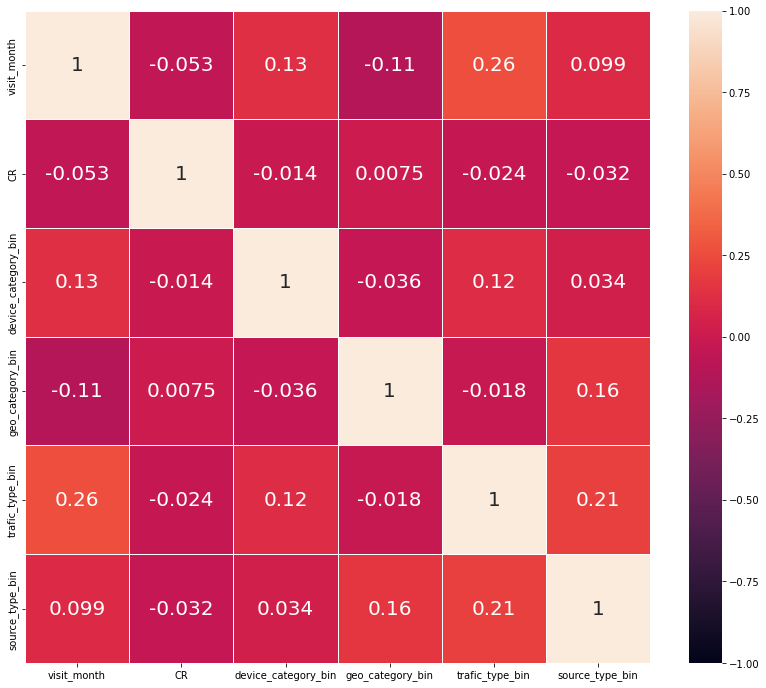

In [33]:
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(), annot=True, linecolor='white', linewidth=0.5,
           annot_kws = {'size': 20}, vmax = 1, vmin = -1)

Между признаками нет явных зависимостей

## 3. Проверка гипотез.

### 0. Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

#### Описание гипотез

**Н0**: органический трафик не отличается от платного с точки зрения CR в целевые события

**Н1**: органический и платный трафик отличаются с точки зрения CR в целевые события

In [34]:
# группируем данные по типу трафика
gr_trafic_type = merged_data.groupby(['visit_month', 'trafic_type'], as_index=False).agg(
    sessions = pd.NamedAgg(column='session_id', aggfunc='count'),
    target_sessions = pd.NamedAgg(column='hit_type', aggfunc=lambda x: x[x == 'target event'].value_counts()[0]),
    CR = pd.NamedAgg(column='CR', aggfunc='mean'))

gr_trafic_type

,visit_month,trafic_type,sessions,target_sessions,CR
0,5.0,ads,27824,1745,6.271564
1,5.0,organic,63085,3673,5.822303
2,6.0,ads,96625,3475,3.596378
3,6.0,organic,43461,2076,4.776696
4,7.0,ads,126041,3089,2.450790
5,7.0,organic,29561,1026,3.470789
6,8.0,ads,108796,3629,3.335601
7,8.0,organic,29072,977,3.360622
8,9.0,ads,180682,4230,2.341130
9,9.0,organic,35814,819,2.286815


<AxesSubplot:xlabel='visit_month', ylabel='CR'>

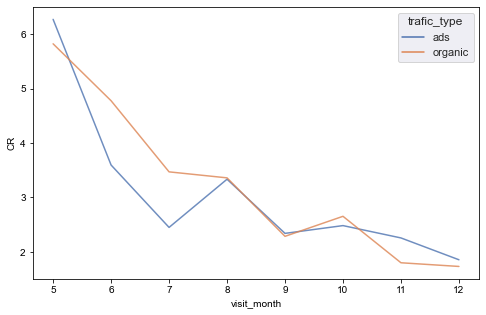

In [35]:
# посмотрим распределение на графике
fig, ax = plt.subplots(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=gr_trafic_type, x='visit_month', y='CR',
            hue='trafic_type',
            alpha=0.8)

На графике не видно значительных различий, но посмотрим, что скажут тесты

In [36]:
# проверим нормальность распределения тестом Шапиро-Уилка
ads = gr_trafic_type[gr_trafic_type.trafic_type == 'ads'].CR
organic = gr_trafic_type[gr_trafic_type.trafic_type == 'organic'].CR

print('p-value:',stats.shapiro(ads)[1])
print('p-value:',stats.shapiro(organic)[1])
# в первом случае p-value < 0.05, значит мы не можем считать, что данные распределены нормально 

p-value: 0.011902459897100925
p-value: 0.37654364109039307


Т.к критерии распределены ненормально и они независимы друг от друга для проверки гипотезы используем тест Манна-Уитни

In [37]:
mann = stats.mannwhitneyu(ads, organic)
print('p-value:', mann[1])

if mann[1] > alpha:
    print('Мы не можем отклонить нулевую гипотезу – органический трафик не отличается от платного с точки зрения CR в целевые события')
else:
    print('Можем принять альтернативную гипотезу – органический и платный трафик отличаются с точки зрения CR в целевые события')

p-value: 0.959129759129759
Мы не можем отклонить нулевую гипотезу – органический трафик не отличается от платного с точки зрения CR в целевые события


### 1. Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate)

#### Описание гипотез

**Н0**: трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR

**Н1**: мобильный и десктопный трафик отличаются с точки зрения CR в целевые события

In [38]:
# группируем данные по типу девайса
gr_device_category = merged_data.groupby(['visit_month', 'device_category'], as_index=False).agg(
    sessions = pd.NamedAgg(column='session_id', aggfunc='count'),
    target_sessions = pd.NamedAgg(column='hit_type', aggfunc=lambda x: x[x == 'target event'].value_counts()[0]),
    CR = pd.NamedAgg(column='CR', aggfunc='mean'))

gr_device_category

,visit_month,device_category,sessions,target_sessions,CR
0,5.0,desktop,29415,2030,6.901241
1,5.0,mobile,61494,3388,5.509481
2,6.0,desktop,24173,1509,6.242502
3,6.0,mobile,115913,4042,3.487098
4,7.0,desktop,51102,1107,2.166256
5,7.0,mobile,104500,3008,2.878469
6,8.0,desktop,33381,1140,3.415116
7,8.0,mobile,104487,3466,3.317159
8,9.0,desktop,48194,1170,2.427688
9,9.0,mobile,168302,3879,2.304785


<AxesSubplot:xlabel='visit_month', ylabel='CR'>

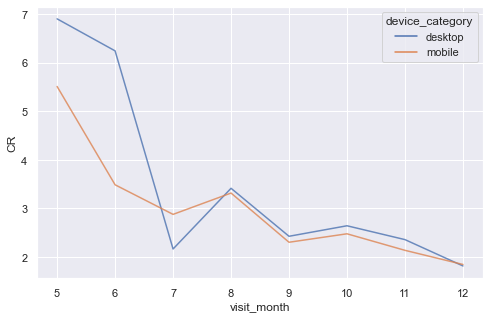

In [39]:
# посмотрим распределение на графике
fig, ax = plt.subplots(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=gr_device_category, x='visit_month', y='CR',
            hue='device_category',
            alpha=0.8)

На графике так же не видно существенных различий

In [40]:
# проверим нормальность распределения тестом Шапиро-Уилка
mobile = gr_device_category[gr_device_category.device_category == 'mobile'].CR
desktop = gr_device_category[gr_device_category.device_category == 'desktop'].CR

print('p-value:',stats.shapiro(mobile)[1])
print('p-value:',stats.shapiro(desktop)[1])
# во втором случае p-value < 0.05, значит мы не можем считать, что данные распределены нормально 

p-value: 0.100823312997818
p-value: 0.015027576126158237


Критерии распределены ненормально, они независимы друг от друга – для проверки гипотезы снова используем тест Манна-Уитни

In [41]:
mann = stats.mannwhitneyu(mobile, desktop)
print('p-value:', mann[1])

if mann[1] > alpha:
    print('Мы не можем отклонить нулевую гипотезу – трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR')
else:
    print('Можем принять альтернативную гипотезу – мобильный и десктопный трафик отличаются с точки зрения CR в целевые события')

p-value: 0.8784770784770783
Мы не можем отклонить нулевую гипотезу – трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR


### 2. Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR в целевые события.

#### Описание гипотез

**Н0**: трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR в целевые события

**Н1**: трафик из столиц и регионов отличаются с точки зрения CR в целевые события

In [42]:
# группируем данные по типу гео
gr_geo_category = merged_data.groupby(['visit_month', 'geo_category'], as_index=False).agg(
    sessions = pd.NamedAgg(column='session_id', aggfunc='count'),
    target_sessions = pd.NamedAgg(column='hit_type', aggfunc=lambda x: x[x == 'target event'].value_counts()[0]),
    CR = pd.NamedAgg(column='CR', aggfunc='mean'))

gr_geo_category

,visit_month,geo_category,sessions,target_sessions,CR
0,5.0,capital,64882,3831,5.904565
1,5.0,other,26027,1587,6.097514
2,6.0,capital,99321,3960,3.987072
3,6.0,other,40765,1591,3.902858
4,7.0,capital,109984,3151,2.864962
5,7.0,other,45618,964,2.113201
6,8.0,capital,105794,3458,3.268616
7,8.0,other,32074,1148,3.579223
8,9.0,capital,159154,3686,2.315996
9,9.0,other,57342,1363,2.376966


<AxesSubplot:xlabel='visit_month', ylabel='CR'>

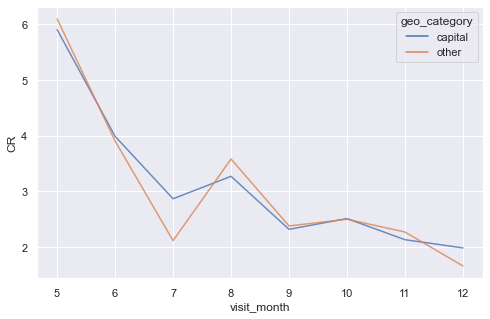

In [43]:
# посмотрим распределение на графике
fig, ax = plt.subplots(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=gr_geo_category, x='visit_month', y='CR',
            hue='geo_category',
            alpha=0.8)

In [44]:
# проверим нормальность распределения тестом Шапиро-Уилка
capital = gr_geo_category[gr_geo_category.geo_category == 'capital'].CR
other = gr_geo_category[gr_geo_category.geo_category == 'other'].CR

print('p-value:',stats.shapiro(capital)[1])
print('p-value:',stats.shapiro(other)[1])
# в обоих случаях p-value > 0.05, значит мы можем считать, что данные распределены нормально

p-value: 0.06450004875659943
p-value: 0.07633935660123825


In [45]:
# т.к распределение нормальное проверим равенство дисперсий, чтобы выбрать подходящий тест для проверки гипотез
stats.levene(capital, other)[1]
# p-value > 0.05 – дисперсии равны

0.8995716602715471

Дисперсии оказались равны – для проверки гипотез используем Т-критерий Стьюдента

In [46]:
ttest = stats.ttest_ind(capital, other)
print('p-value:', ttest[1])

if ttest[1] > alpha:
    print('Мы не можем отклонить нулевую гипотезу – трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR')
else:
    print('Можем принять альтернативную гипотезу – мобильный и десктопный трафик отличаются с точки зрения CR в целевые события')

p-value: 0.9330464757496735
Мы не можем отклонить нулевую гипотезу – трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR


## 4. Ответы на вопросы продуктовой команды.

### 0. Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [47]:
merged_data.head()

,session_id,utm_source,utm_campaign,device_category,geo_country,geo_city,visit_month,geo_category,trafic_type,source_type,hit_type,model,CR
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Zlatoust,11.0,other,ads,other,event,other,0
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,FTjNLDyTrXaWYgZymFkV,mobile,Russia,Moscow,11.0,capital,ads,social,event,other,0
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Krasnoyarsk,12.0,other,ads,other,event,other,0
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,(not set),mobile,Russia,Moscow,5.0,capital,ads,other,event,other,0
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,(not set),mobile,Russia,Moscow,5.0,capital,ads,other,event,other,0


#### Начнём с определения наиболее успешных источников трафика

Для определения лучших источников по CR я исключила данные в которых было менее ≈6300 посещений, т.к они не отражают реальной картины и могут привести к ошибочным выводам. Значение 6300 – это среднее кол-во сессий с utm_source. В ответах на следующие вопросы также буду исключать значения ниже средних

In [48]:
# группируем данные по utm_source и определяем топ-5 источников 
gr_utm_source = merged_data.groupby(['utm_source'], as_index=False).agg(
    sessions = pd.NamedAgg(column='session_id', aggfunc='count'),
    target_sessions = pd.NamedAgg(column='hit_type', aggfunc=lambda x: x[x == 'target event'].value_counts()[0] if len(x[x == 'target event'].value_counts()) > 0 else 0),
    CR = pd.NamedAgg(column='CR', aggfunc='mean'))

mean_sessions = gr_utm_source.sessions.mean()
print('Среднее кол-во сессий с utm_source:', round(mean_sessions))
  
target_utm_source = gr_utm_source.sort_values('target_sessions', ascending=False).head()
cr_utm_source = gr_utm_source[gr_utm_source.sessions > mean_sessions].sort_values('CR', ascending=False).head()

Среднее кол-во сессий с utm_source: 5624


In [49]:
# топ-5 по объёму целевого трафика
target_utm_source

,utm_source,sessions,target_sessions,CR
146,ZpYIoDJMcFzVoPFsHGJL,485489,13360,2.751865
175,fDLlAcSmythWSCVMvqvL,253135,8928,3.526972
206,kjsLglQLzykiRbcDiGcD,223527,5289,2.366157
154,bByPQxmDaMXgpHeypKSM,86040,4676,5.434682
6,BHcvLfOaCWvWTykYqHVe,97625,3278,3.357746


In [50]:
# топ-5 по объёму CR
cr_utm_source

,utm_source,sessions,target_sessions,CR
151,aXQzDWsJuGXeBXexNHjc,26290,1525,5.800685
154,bByPQxmDaMXgpHeypKSM,86040,4676,5.434682
175,fDLlAcSmythWSCVMvqvL,253135,8928,3.526972
6,BHcvLfOaCWvWTykYqHVe,97625,3278,3.357746
146,ZpYIoDJMcFzVoPFsHGJL,485489,13360,2.751865


Text(0.5, 0.98, 'Топ-5 источников')

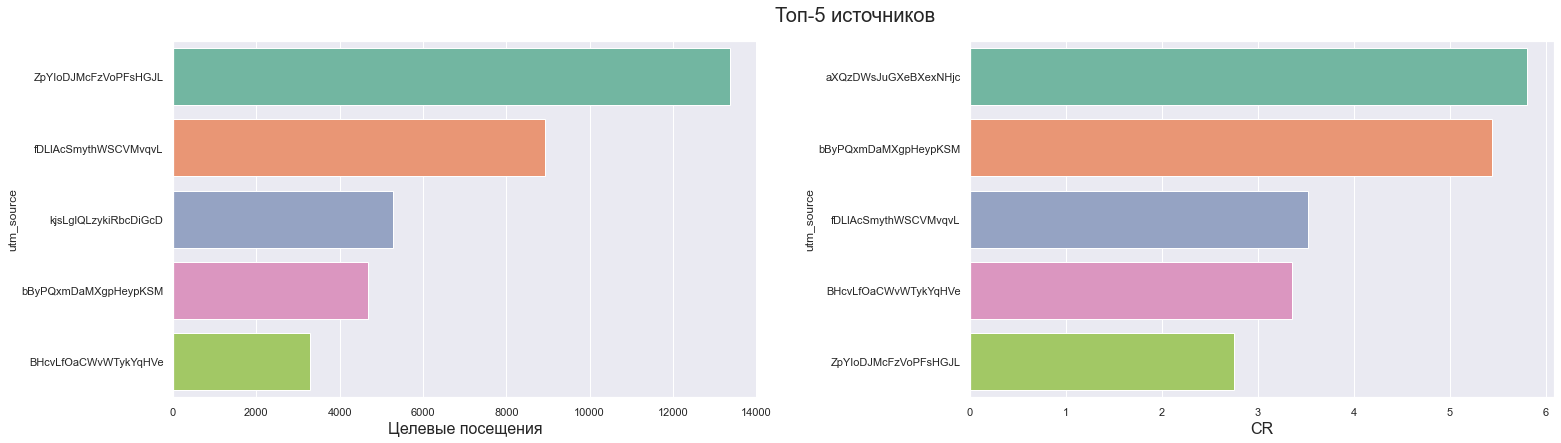

In [51]:
# топ-5 на графике
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.tight_layout(w_pad=15)
plt.subplots_adjust(top=0.9)

sns.barplot(ax=ax[0], data=target_utm_source, x='target_sessions', y='utm_source', palette='Set2')
sns.barplot(ax=ax[1], data=cr_utm_source, x='CR', y='utm_source', palette='Set2')

ax[0].set_xlabel('Целевые посещения', fontsize=16)
ax[1].set_xlabel('CR', fontsize=16)
fig.suptitle('Топ-5 источников', fontsize=20)

#### Определение наиболее успешных кампаний

Из анализа убрала неразмеченные кампании (not set). Из-за отстутствия разметки мы не сможем извлечь никакой полезной информации

In [52]:
# группируем данные по utm_campaign и определяем топ-5 источников 
gr_utm_campaign = merged_data.groupby(['utm_campaign'], as_index=False).agg(
    sessions = pd.NamedAgg(column='session_id', aggfunc='count'),
    target_sessions = pd.NamedAgg(column='hit_type', aggfunc=lambda x: x[x == 'target event'].value_counts()[0] if len(x[x == 'target event'].value_counts()) > 0 else 0),
    CR = pd.NamedAgg(column='CR', aggfunc='mean'))

mean_sessions = gr_utm_campaign.sessions.mean()
print('Среднее кол-во сессий с utm_campaign:', round(mean_sessions))
  
target_campaign = gr_utm_campaign[gr_utm_campaign.utm_campaign != '(not set)'].sort_values('target_sessions', ascending=False).head()
cr_utm_campaign = gr_utm_campaign[(gr_utm_campaign.sessions > mean_sessions) & (gr_utm_campaign.utm_campaign != '(not set)')].sort_values('CR', ascending=False).head()

Среднее кол-во сессий с utm_campaign: 3870


In [53]:
# топ-5 по объёму целевого трафика
target_campaign

,utm_campaign,sessions,target_sessions,CR
87,LTuZkdKfxRGVceoWkVyg,390235,16029,4.107525
84,LEoPHuyFvzoNfnzGgfcd,272276,7862,2.887511
252,gecBYcKZCPMcVYdSSzKP,112227,3739,3.331640
39,FTjNLDyTrXaWYgZymFkV,208310,2081,0.998992
345,sbJRYgVfvcnqKJNDDYIr,16911,481,2.844303


In [54]:
# топ-5 по объёму CR
cr_utm_campaign

,utm_campaign,sessions,target_sessions,CR
87,LTuZkdKfxRGVceoWkVyg,390235,16029,4.107525
252,gecBYcKZCPMcVYdSSzKP,112227,3739,3.331640
236,eimRuUrNhZLAYcwRrNXu,6497,212,3.263044
84,LEoPHuyFvzoNfnzGgfcd,272276,7862,2.887511
276,jqlUOdZBNZYfInQVcZlS,5375,154,2.865116


Text(0.5, 0.98, 'Топ-5 кампаний')

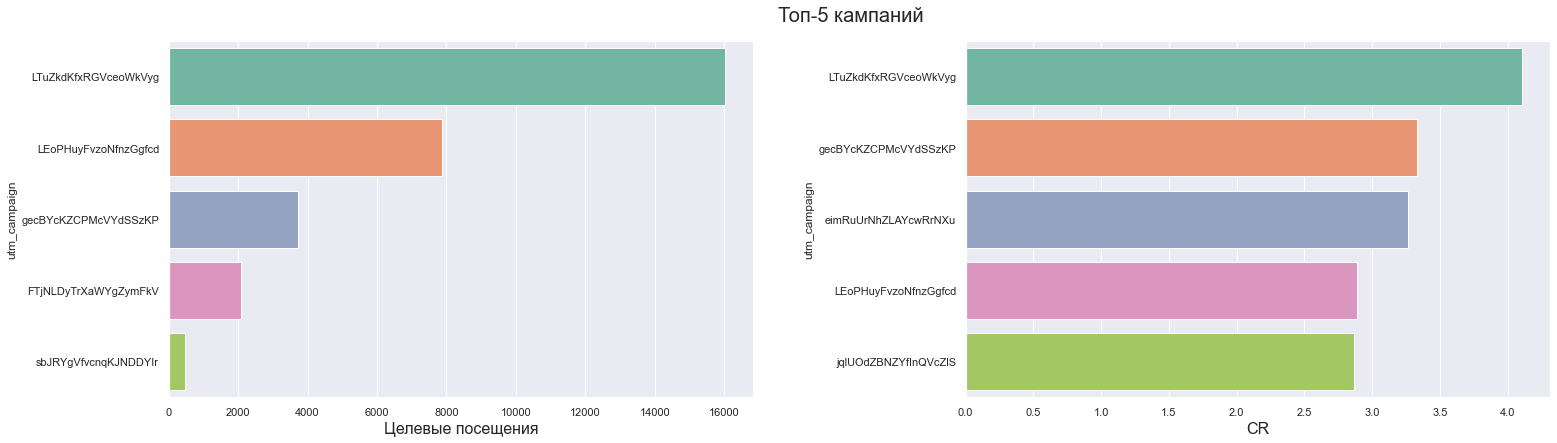

In [55]:
# топ-5 на графике
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.tight_layout(w_pad=15)
plt.subplots_adjust(top=0.9)

sns.barplot(ax=ax[0], data=target_campaign, x='target_sessions', y='utm_campaign', palette='Set2')
sns.barplot(ax=ax[1], data=cr_utm_campaign, x='CR', y='utm_campaign', palette='Set2')

ax[0].set_xlabel('Целевые посещения', fontsize=16)
ax[1].set_xlabel('CR', fontsize=16)
fig.suptitle('Топ-5 кампаний', fontsize=20)

#### Определение топовых локаций


In [56]:
# группируем данные по странам и определяем топ-5 источников 
gr_geo = merged_data.groupby(['geo_country'], as_index=False).agg(
    sessions = pd.NamedAgg(column='session_id', aggfunc='count'),
    target_sessions = pd.NamedAgg(column='hit_type', aggfunc=lambda x: x[x == 'target event'].value_counts()[0] if len(x[x == 'target event'].value_counts()) > 0 else 0),
    CR = pd.NamedAgg(column='CR', aggfunc='mean'))

mean_geo = gr_geo.sessions.mean()
print('Среднее кол-во сессий из разных локаций:', round(mean_geo))
  
target_geo = gr_geo.sort_values('target_sessions', ascending=False).head()
cr_geo = gr_geo[gr_geo.sessions > mean_geo].sort_values('CR', ascending=False).head()

Среднее кол-во сессий из разных локаций: 9651


In [57]:
# топ-5 по объёму целевого трафика
target_geo

,geo_country,sessions,target_sessions,CR
119,Russia,1513420,41353,2.732421
150,Ukraine,7595,167,2.198815
51,Germany,1860,61,3.279570
153,United States,9920,49,0.493952
73,Kazakhstan,1928,47,2.437759


In [58]:
# топ по CR
cr_geo

,geo_country,sessions,target_sessions,CR
119,Russia,1513420,41353,2.732421
153,United States,9920,49,0.493952


Разбивка по странам не очень информативна, т.к сервис работает на территории РФ и подавляющее большинство пользователей тоже из РФ. Поэтому посмотрим разбивку по городам страны

In [59]:
# группируем данные по городам и определяем топ-5 источников 
gr_geo = merged_data[merged_data.geo_country == 'Russia'].groupby(['geo_city'], as_index=False).agg(
    sessions = pd.NamedAgg(column='session_id', aggfunc='count'),
    target_sessions = pd.NamedAgg(column='hit_type', aggfunc=lambda x: x[x == 'target event'].value_counts()[0] if len(x[x == 'target event'].value_counts()) > 0 else 0),
    CR = pd.NamedAgg(column='CR', aggfunc='mean'))

mean_geo = gr_geo.sessions.mean()
print('Среднее кол-во сессий из разных локаций:', round(mean_geo))
  
target_geo = gr_geo[gr_geo.geo_city != '(not set)'].sort_values('target_sessions', ascending=False).head()
cr_geo = gr_geo[(gr_geo.sessions > mean_geo) & (gr_geo.geo_city != '(not set)')].sort_values('CR', ascending=False).head()

Среднее кол-во сессий из разных локаций: 3003


In [60]:
# топ-5 по объёму целевого трафика
target_geo

,geo_city,sessions,target_sessions,CR
246,Moscow,676633,19907,2.942068
349,Saint Petersburg,249611,5994,2.401336
146,Kazan,24863,969,3.897358
187,Krasnodar,27070,901,3.328408
478,Yekaterinburg,30033,756,2.517231


In [61]:
# топ-5 по CR
cr_geo

,geo_city,sessions,target_sessions,CR
92,Domodedovo,3416,223,6.528103
397,Stavropol,3683,151,4.099919
146,Kazan,24863,969,3.897358
177,Korolyov,3472,131,3.773041
385,Sochi,7481,258,3.448737


Text(0.5, 0.98, 'Топ-5 городов')

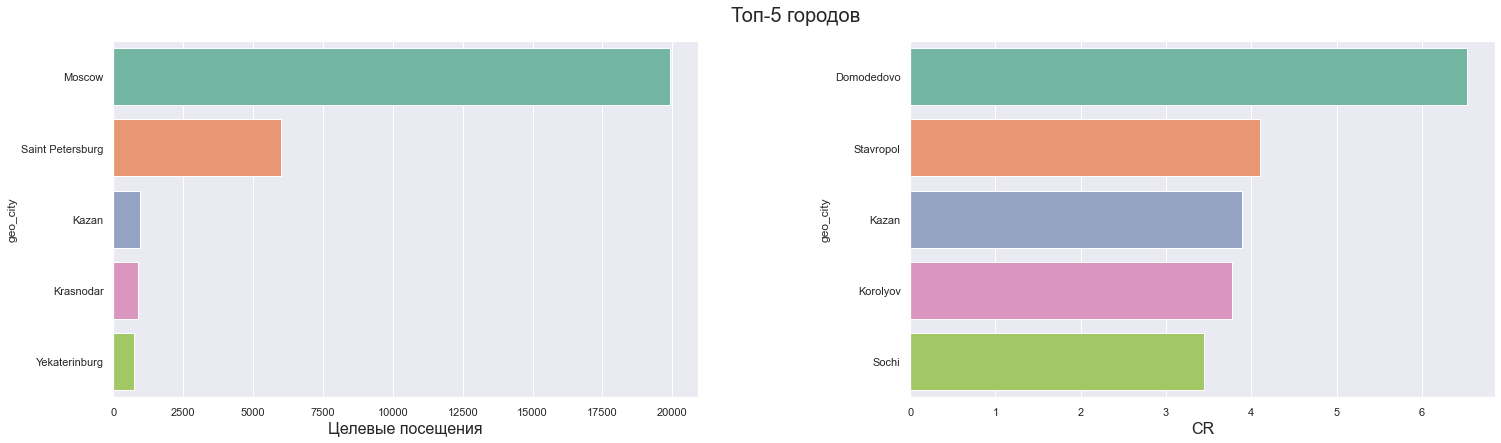

In [62]:
# топ-5 на графике
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.tight_layout(w_pad=15)
plt.subplots_adjust(top=0.9)

sns.barplot(ax=ax[0], data=target_geo, x='target_sessions', y='geo_city', palette='Set2')
sns.barplot(ax=ax[1], data=cr_geo, x='CR', y='geo_city', palette='Set2')

ax[0].set_xlabel('Целевые посещения', fontsize=16)
ax[1].set_xlabel('CR', fontsize=16)
fig.suptitle('Топ-5 городов', fontsize=20)

По кол-ву сессий никаких сюрпризов – на первых местах Москва и Санкт-Петербург. А с CR есть интересные наблюдения – помимо городов Подмосковья в топ попали города с юга страны и Казань, возможно стоит обратить внимание на эти направления

#### Устройства с которых приходит самый целевой трафик



In [75]:
# группируем данные по типам устройств 
gr_device_category2 = merged_data.groupby(['device_category'], as_index=False).agg(
    sessions = pd.NamedAgg(column='session_id', aggfunc='count'),
    target_sessions = pd.NamedAgg(column='hit_type', aggfunc=lambda x: x[x == 'target event'].value_counts()[0] if len(x[x == 'target event'].value_counts()) > 0 else 0),
    CR = pd.NamedAgg(column='CR', aggfunc='mean'))

,device_category,sessions,target_sessions,CR
0,desktop,308894,9726,3.148653
1,mobile,1254643,32579,2.596675


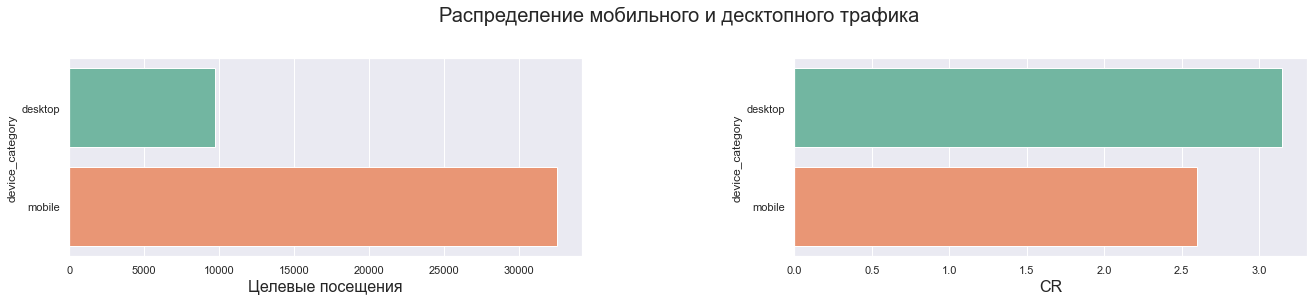

In [76]:
# распределение на графике
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
fig.tight_layout(w_pad=15)
plt.subplots_adjust(top=0.8)

sns.barplot(ax=ax[0], data=gr_device_category2, x='target_sessions', y='device_category', palette='Set2')
sns.barplot(ax=ax[1], data=gr_device_category2, x='CR', y='device_category', palette='Set2')

ax[0].set_xlabel('Целевые посещения', fontsize=16)
ax[1].set_xlabel('CR', fontsize=16)
fig.suptitle('Распределение мобильного и десктопного трафика', fontsize=20)

gr_device_category2

Видно, что объём мобильного трафика значительно больше, но CR у десктопа все таки выше. Дополнительно посмотрим на показатели в динамике

<AxesSubplot:xlabel='visit_month', ylabel='sessions'>

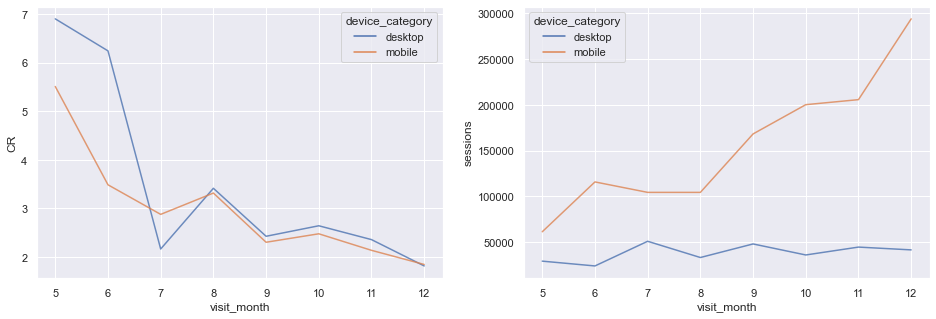

In [77]:
# посмотрим распределение временном на графике
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.set_theme(style="darkgrid")
sns.lineplot(ax=ax[0], data=gr_device_category, x='visit_month', y='CR',
            hue='device_category',
            alpha=0.8)

sns.lineplot(ax=ax[1], data=gr_device_category, x='visit_month', y='sessions',
            hue='device_category',
            alpha=0.8)

Здесь видно, что мобильный трафик сильно приростает по кол-ву сессий, но CR у него падает. Возможно с мобильных устройств не так удобно оставить заявку

### 1. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

In [78]:
# группируем данные по маркам авто
gr_model = merged_data[merged_data.model != 'other'].groupby(['model'], as_index=False).agg(
    sessions = pd.NamedAgg(column='session_id', aggfunc='count'),
    target_sessions = pd.NamedAgg(column='hit_type', aggfunc=lambda x: x[x == 'target event'].value_counts()[0] if len(x[x == 'target event'].value_counts()) > 0 else 0),
    CR = pd.NamedAgg(column='CR', aggfunc='mean'))

mean_sessions = gr_model.sessions.mean()
print('Среднее кол-во сессий на модель авто:', round(mean_sessions))
  
target_model = gr_model.sort_values('target_sessions', ascending=False).head()
cr_model = gr_model[gr_model.sessions > mean_sessions].sort_values('CR', ascending=False).head()

Среднее кол-во сессий на модель авто: 2682


In [79]:
target_model

,model,sessions,target_sessions,CR
56,skoda rapid,27092,2058,7.596338
25,lada-vaz vesta,23353,1955,8.371515
64,volkswagen polo,16883,1634,9.678375
20,kia rio,4381,487,11.116184
53,skoda karoq,9962,475,4.768119


In [80]:
cr_model

,model,sessions,target_sessions,CR
58,toyota camry,3408,420,12.323944
20,kia rio,4381,487,11.116184
64,volkswagen polo,16883,1634,9.678375
55,skoda octavia,3438,294,8.551483
25,lada-vaz vesta,23353,1955,8.371515


Text(0.5, 0.98, 'Топ-5 марок авто')

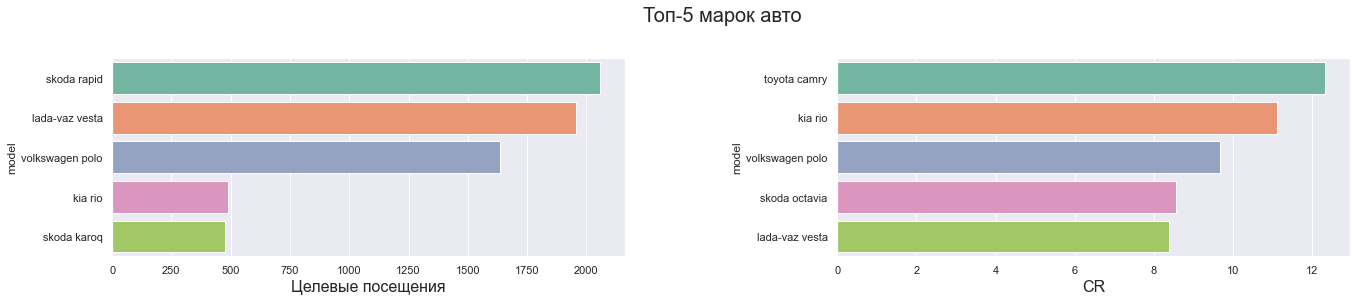

In [81]:
# распределение на графике
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
fig.tight_layout(w_pad=15)
plt.subplots_adjust(top=0.8)

sns.barplot(ax=ax[0], data=target_model, x='target_sessions', y='model', palette='Set2')
sns.barplot(ax=ax[1], data=cr_model, x='CR', y='model', palette='Set2')

ax[0].set_xlabel('Целевые посещения', fontsize=16)
ax[1].set_xlabel('CR', fontsize=16)
fig.suptitle('Топ-5 марок авто', fontsize=20)

Большинство автомобилей представленных на графиках относятся к эконом-классу, именно они и пользуются наибольшим спросом

## 3. Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

In [82]:
# сгруппируем данные по типу источниа
gr_source = merged_data.groupby(['source_type'], as_index=False).agg(
    sessions = pd.NamedAgg(column='session_id', aggfunc='count'),
    target_sessions = pd.NamedAgg(column='hit_type', aggfunc=lambda x: x[x == 'target event'].value_counts()[0] if len(x[x == 'target event'].value_counts()) > 0 else 0),
    CR = pd.NamedAgg(column='CR', aggfunc='mean'))

,source_type,sessions,target_sessions,CR
0,other,1332450,38907,2.919959
1,social,231087,3398,1.470442


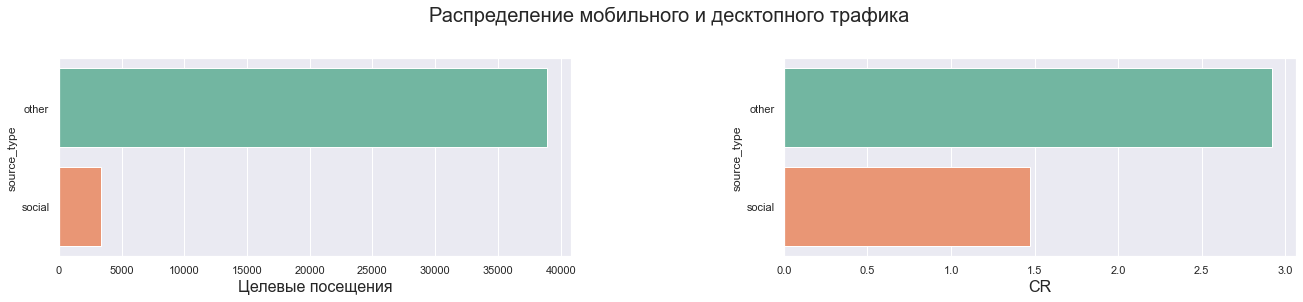

In [83]:
# распределение на графике
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
fig.tight_layout(w_pad=15)
plt.subplots_adjust(top=0.8)

sns.barplot(ax=ax[0], data=gr_source, x='target_sessions', y='source_type', palette='Set2')
sns.barplot(ax=ax[1], data=gr_source, x='CR', y='source_type', palette='Set2')

ax[0].set_xlabel('Целевые посещения', fontsize=16)
ax[1].set_xlabel('CR', fontsize=16)
fig.suptitle('Распределение мобильного и десктопного трафика', fontsize=20)

gr_source

На графиках видно, что по сравнению с другими видами трафика соцсети занимают незначительную часть. CR из соцсетей в два раза ниже показателей из других источников. Дополнительно посмотрим на показатели в динамике

In [84]:
gr_source2 = merged_data.groupby(['visit_month', 'source_type'], as_index=False).agg(
    sessions = pd.NamedAgg(column='session_id', aggfunc='count'),
    target_sessions = pd.NamedAgg(column='hit_type', aggfunc=lambda x: x[x == 'target event'].value_counts()[0] if len(x[x == 'target event'].value_counts()) > 0 else 0),
    CR = pd.NamedAgg(column='CR', aggfunc='mean'))

<AxesSubplot:xlabel='visit_month', ylabel='sessions'>

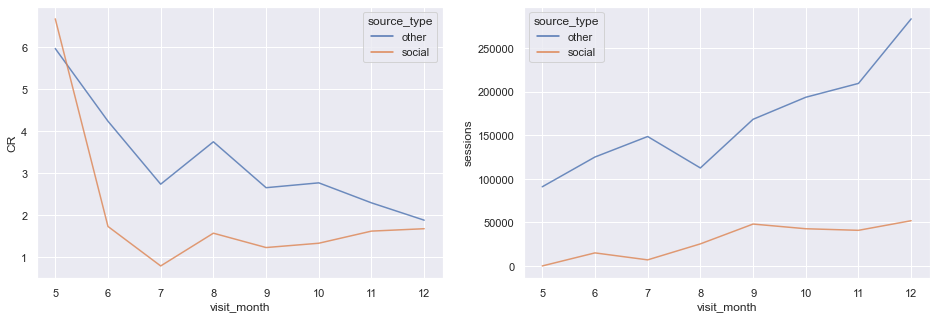

In [85]:
# посмотрим распределение временном на графике
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.set_theme(style="darkgrid")
sns.lineplot(ax=ax[0], data=gr_source2, x='visit_month', y='CR',
            hue='source_type',
            alpha=0.8)

sns.lineplot(ax=ax[1], data=gr_source2, x='visit_month', y='sessions',
            hue='source_type',
            alpha=0.8)

Видна положительная динамика и по кол-ву визитов и по CR. 
Но точно ответить на вопрос все же не получится – не хватает данных. Для точного ответа нужна информация о стоимости привлечения лидов и их поведение дальше по воронке

**В целом, для более точных ответов на вопросы о продукте лучше иметь полную картину о прохождении лида по воронке и знать показатели ROMI/ROI, и т.к у нас сервис подписки знание LTV тоже будет плюсом**